# 3. 手書き文字(数字)認識の実践

In [1]:
# coding: utf-8
'''
    初期設定箇所。このセルは変更せずに実行してください
'''
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt #グラフの描画
import os, sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer
from common.functions import sigmoid

## 3-1. MNISTデータの表示

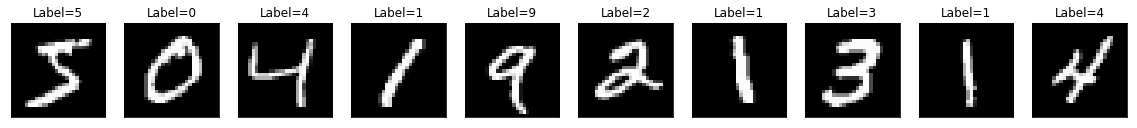

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True) # MNISTデータの読み込み
'''
    x_train: トレーニング用データ             (60000, 784)
    t_train: トレーニング用データの正解ラベル (60000,)
    x_test: テスト用データ                    (10000, 784)
    t_test: テスト用データの正解ラベル        (10000,)
'''
number_images = 10 # 最初の10枚だけ読み込む
fig = plt.figure(figsize=(20, 2))
for number in range(number_images):
    fig.add_subplot(1,number_images,number+1)
    plt.title("Label={0}".format(t_train[number])) # 正解ラベルの表示
    plt.imshow(np.array(x_train[number].reshape(28, 28)),cmap='gray', aspect="equal") # 画像を28x28に成形したうえで描画する
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off") # 軸を削除

## 3-2. ニューラルネットワークの学習

train loss:2.54477051985 === epoch:1, train acc:0.09055, test acc:0.086 ===
train loss:2.22862152878 === epoch:2, train acc:0.417766666667, test acc:0.4153 ===
train loss:2.09978930405 === epoch:3, train acc:0.584383333333, test acc:0.5865 ===
train loss:1.93094849428 === epoch:4, train acc:0.600216666667, test acc:0.609 ===
train loss:1.71551615793 === epoch:5, train acc:0.628633333333, test acc:0.6379 ===
train loss:1.53240532977 === epoch:6, train acc:0.7004, test acc:0.7099 ===
train loss:1.20089696416 === epoch:7, train acc:0.737433333333, test acc:0.7473 ===
train loss:1.006019056166 === epoch:8, train acc:0.778883333333, test acc:0.7842 ===
train loss:0.958752410743 === epoch:9, train acc:0.798166666667, test acc:0.8049 ===
train loss:0.982635936821 === epoch:10, train acc:0.813233333333, test acc:0.8181 ===
train loss:0.683108425807
=============== Final Test Accuracy ===============
test acc:0.8325


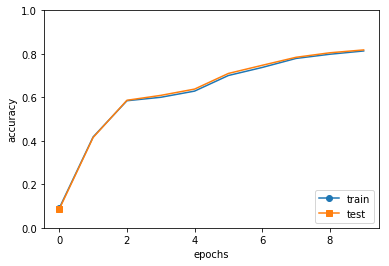

In [3]:
'''
    以下の4行が学習の処理を行っている箇所
    60,000枚から100枚の画像をランダムに抽出し損失関数の値を算出、train lossとして表示
    上記を600回繰り返すごとにepoch +1、トレーニング用およびテスト用データそれぞれについての精度を表示
'''
network = MultiLayerNetExtend(input_size=784, hidden_size_list=[50, 100], output_size=10, activation="sigmoid")
trainer = Trainer(network, x_train, t_train, x_test, t_test, epochs=10, mini_batch_size=100, optimizer="SGD", optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

'''
    epochを10まで繰り返し、結果をグラフ表示
'''
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## 3-3. 学習したニューラルネットによる推論

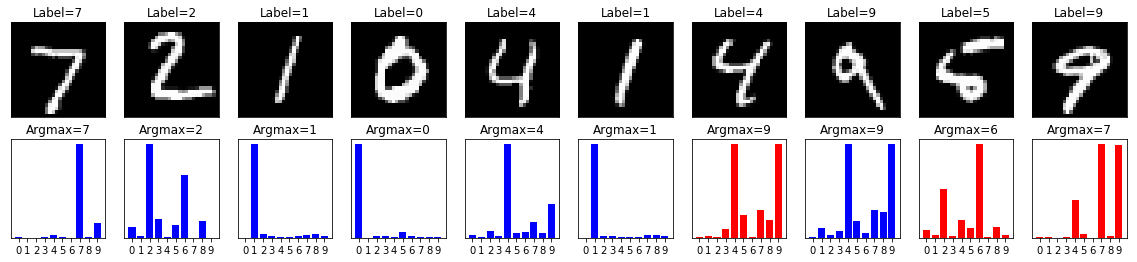

In [7]:
'''
    先ほどの学習によって(そこそこに)最適化されたパラメータを読み込む
'''
W1, W2, W3 = network.params['W1'].T, network.params['W2'].T, network.params['W3'].T
b1, b2, b3 = network.params['b1'], network.params['b2'], network.params['b3']

'''
    テストデータの最初の10枚を学習済のニューラルネットワークに流し込んで計算、推論の結果を表示
'''
fig = plt.figure(figsize=(20, 4))
for ittr in range(10):

# 以下の3行が推論の計算そのもの

    z1 = sigmoid( np.dot(W1, x_test[ittr]) + b1 )
    z2 = sigmoid( np.dot(W2, z1) + b2 )
    z3 = np.dot(W3, z2) + b3

# 以下は表示の処理
    if np.argmax(z3) == t_test[ittr]:
        t_color = "blue"
    else:
        t_color = "red"

    fig.add_subplot(2, 10 , ittr+1)
    plt.title("Label={0}".format(t_test[ittr])) # 正解ラベルの表示
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
    plt.imshow(np.array(x_test[ittr].reshape(28, 28)),cmap='gray', aspect="equal")
    
    fig.add_subplot(2, 10, ittr+11)
    plt.bar(np.array(range(10)), np.exp(z3)/np.sum(np.exp(z3)), color=t_color)
    plt.tick_params(labelleft="off", left="off")
    plt.title("Argmax={0}".format(np.argmax(z3))) # 推論結果の表示
    plt.xticks(range(10))
    
plt.show()

## 3-4. 学習後の重みパラメータW1を見てみる

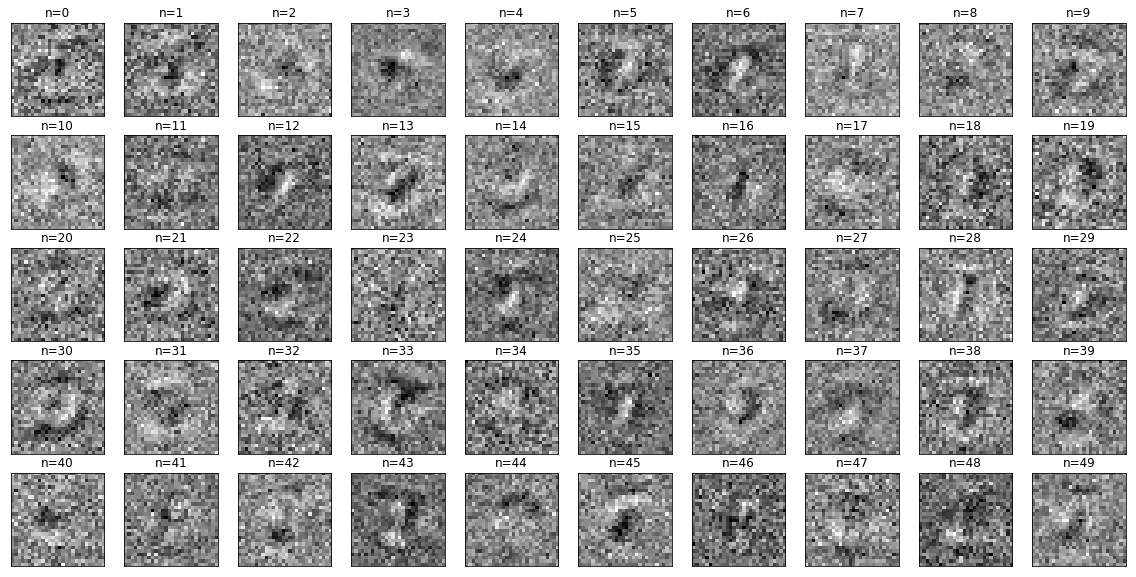

In [8]:
# W1の各列の要素を28x28に図示
fig = plt.figure(figsize=(20, 10))
for ittr in range(50):
    fig.add_subplot(5, 10 , ittr+1)
    plt.title("n={0}".format(ittr))
    plt.imshow(np.array(W1[ittr].reshape(28,28)),cmap='gray', aspect="equal")
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
plt.show()

## 3-5. W2の重みでW1を重ね合わせてみる

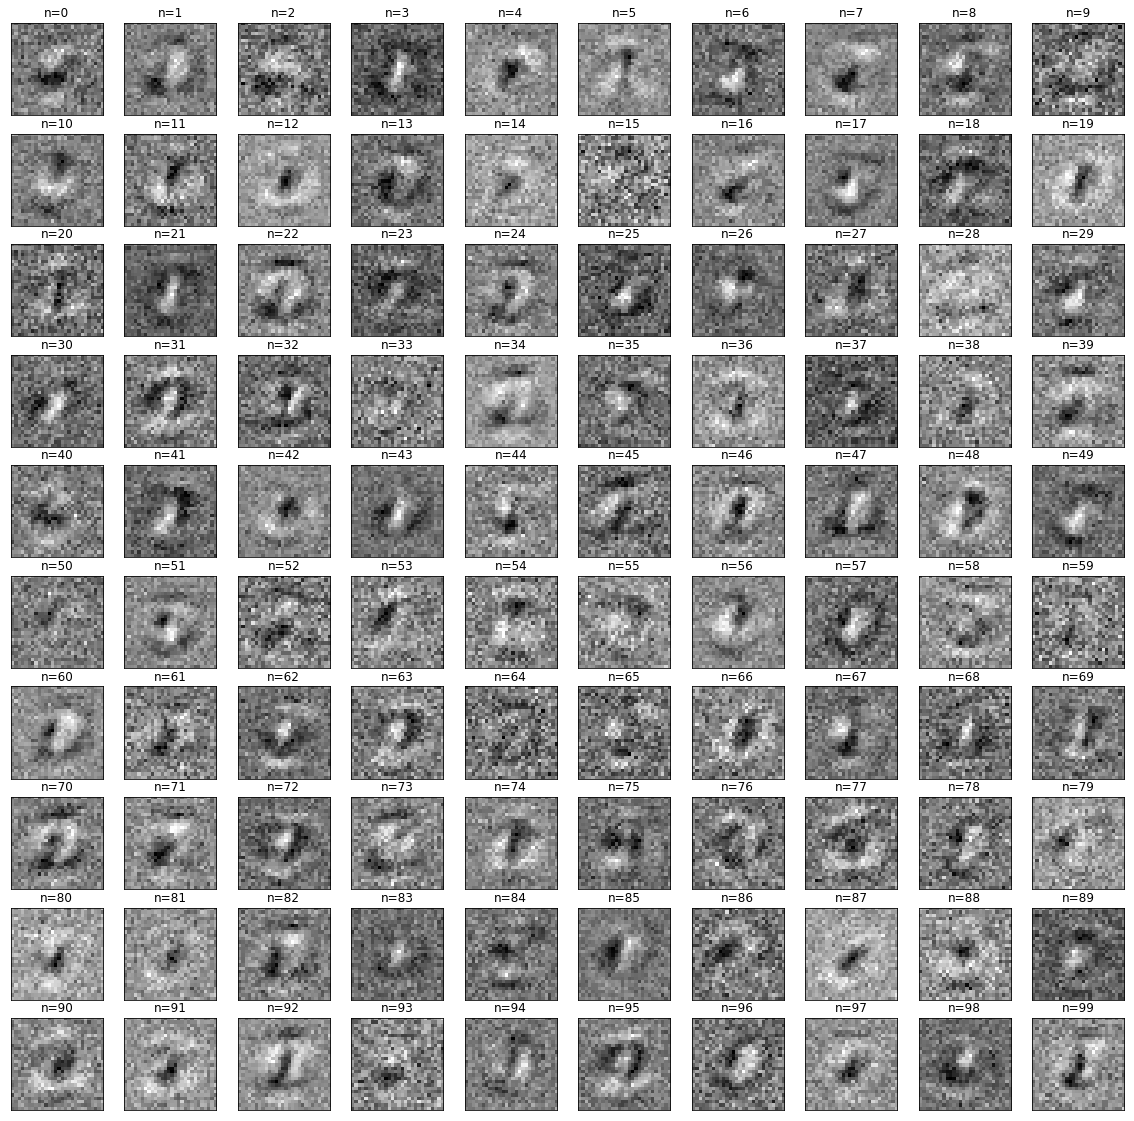

In [9]:
W1w = np.zeros((100,784))
for j in range(100):
    for i in range(50):
        W1w[j][:] += W1[i][:] * W2[j][i]
        
fig = plt.figure(figsize=(20, 20))
for ittr in range(100):
    fig.add_subplot(10, 10 , ittr+1)
    plt.title("n={0}".format(ittr))
    plt.imshow(np.array(W1w[ittr].reshape(28,28)),cmap='gray', aspect="equal")
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
plt.show()

## 3-6. さらにW3の重みで重ね合わせてみる

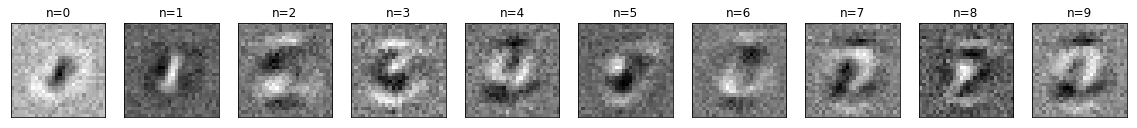

In [10]:
W2w = np.zeros((10,784))
for j in range(10):
    for i in range(100):
        W2w[j][:] += W1w[i][:] * W3[j][i]
        
fig = plt.figure(figsize=(20, 2))
for ittr in range(10):
    fig.add_subplot(1, 10 , ittr+1)
    plt.title("n={0}".format(ittr))
    plt.imshow(np.array(W2w[ittr].reshape(28,28)),cmap='gray', aspect="equal")
    plt.tick_params(labelbottom="off", bottom="off", labelleft="off", left="off")
plt.show()